In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys, glob

In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
from datetime import datetime

In [5]:
DATA_DIR = "../csse_covid_19_data/csse_covid_19_daily_reports"

## Data loading

In [6]:
csv_files = glob.glob(DATA_DIR + "/*.csv")

In [7]:
def extract_date(file_name):
    date_str = os.path.basename(file_name)[:-4]
#     print(date_str)
    
#     date = datetime.strptime(match.group(), '%Y-%m-%d').date()
    date = datetime.strptime(date_str, '%m-%d-%Y').date()
#     print(date)
    
    return date

In [8]:
world_df = None

for csv_file in csv_files:
    
    df = pd.read_csv(csv_file)
    date = extract_date(csv_file)
    df['Date'] = date
    
    if world_df is None:
        world_df = df
    else:
        world_df = pd.concat((world_df, df), ignore_index=True)
    
#     break

In [9]:
italy_df = world_df[world_df['Country/Region'] == 'Italy'].sort_values(by='Date')

In [10]:
# italy_df[italy_df['Date'] == datetime.date(2020, 1, 31)]
italy_df[italy_df['Date'] == datetime.strptime("03-03-2020", '%m-%d-%Y').date()]

# datetime.strptime(date_str, '%m-%d-%Y').date()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude
3465,NaN,Italy,2020-03-03T20:03:06,2502.0,79.0,160.0,2020-03-03,43.0,12.0


In [11]:
italy_df['Date'].iloc[0]

datetime.date(2020, 1, 31)

In [12]:
italy_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude
3768,NaN,Italy,1/31/2020 23:59,2.0,NaN,NaN,2020-01-31,NaN,NaN
750,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0,2020-02-01,NaN,NaN
3829,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-02,NaN,NaN
534,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-03,NaN,NaN
1322,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-04,NaN,NaN


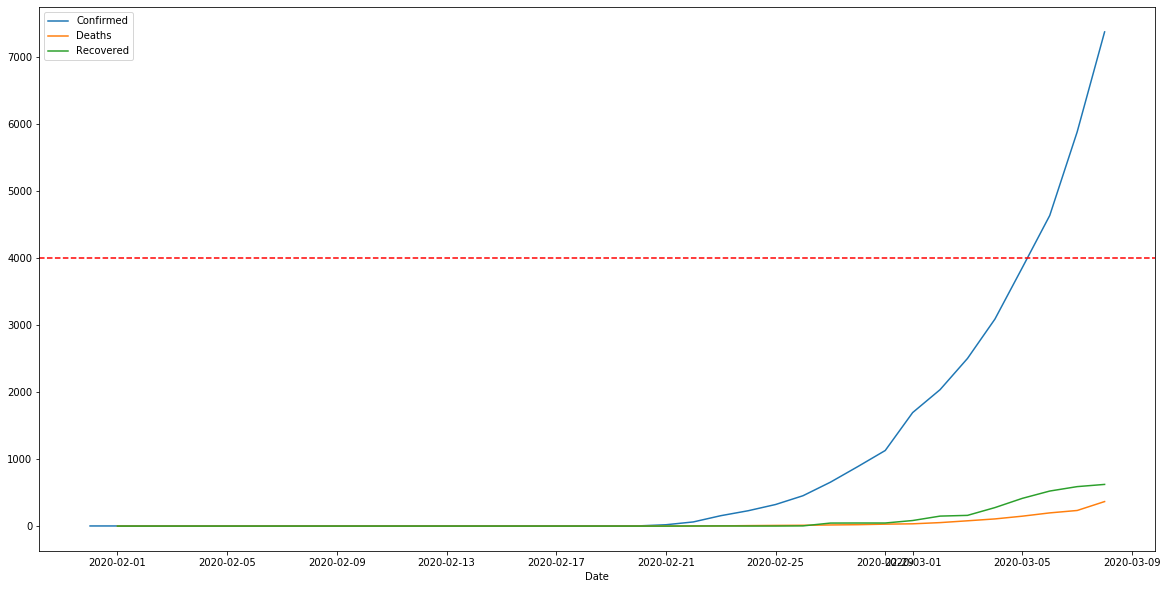

In [13]:
ax = plt.gca()

italy_df.plot(x='Date', y=["Confirmed", "Deaths"], figsize=(20,10), ax=ax)
italy_df.plot(x='Date', y=["Recovered"], figsize=(20,10), ax=ax)
ax.axhline(4000, 0, 1, ls='--', color='red')

$y = e^{ax}$

$\ln{y} = ax$

## ML analysis

In [14]:
y = np.log(italy_df['Confirmed'])

In [15]:
x = np.arange(len(y))

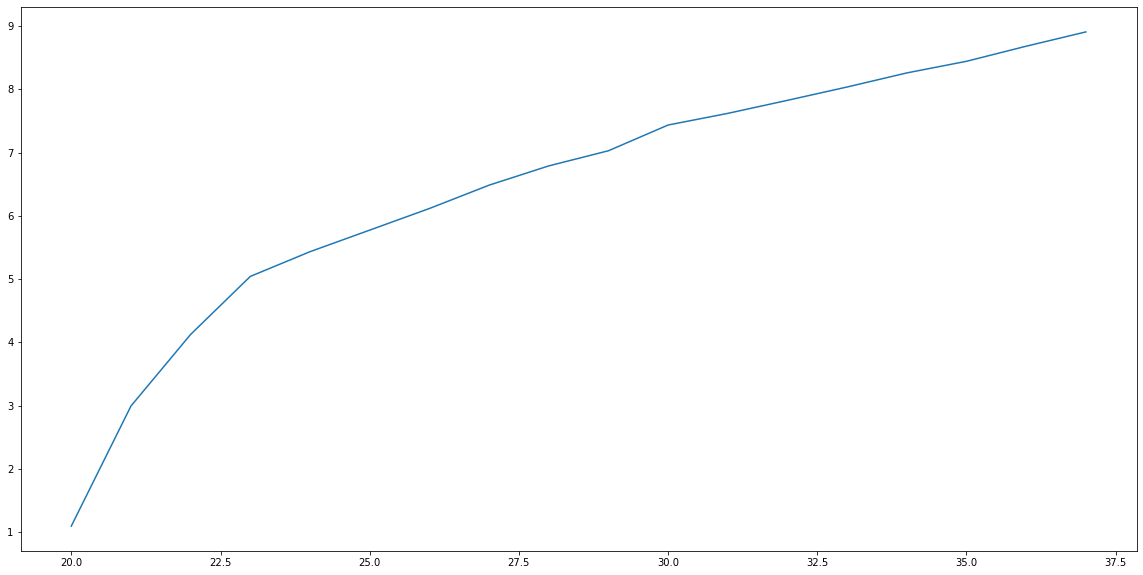

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(x[20:], y[20:])



In [17]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()

In [50]:
# Set range of data to build model
RANGE_START = 5
RANGE_END = 38

In [51]:
reg.fit(x[RANGE_START:RANGE_END][:,np.newaxis], y[RANGE_START:RANGE_END])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_hat = reg.predict(x[:, np.newaxis])

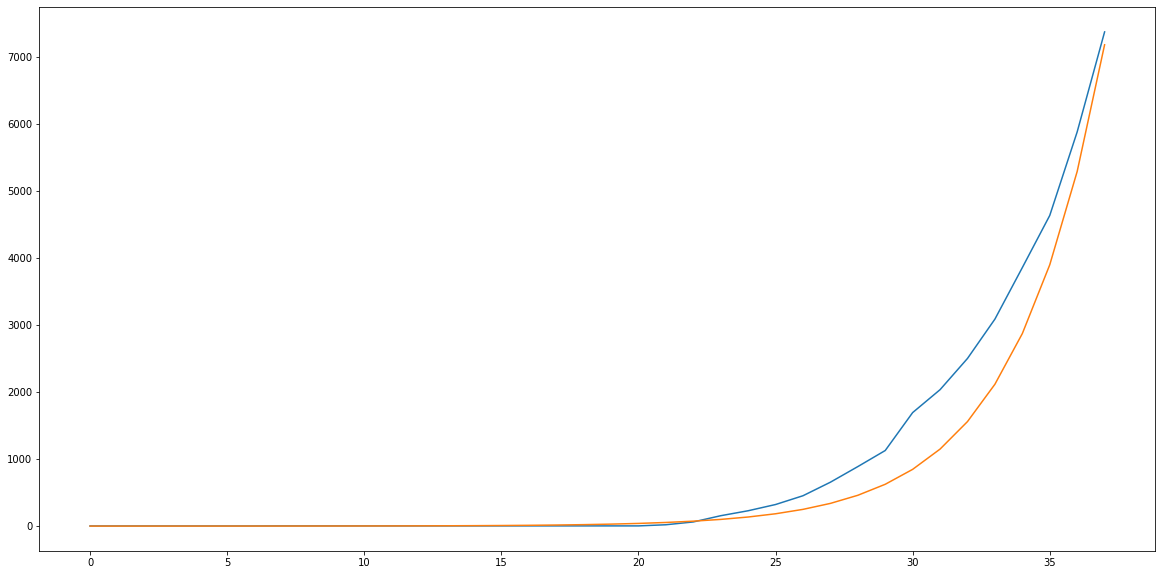

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(x, np.exp(y))
plt.plot(x, np.exp(y_hat))

### Create dataframe with estimates

In [54]:
estimate_dates = pd.date_range(start='1/31/2020', end='03/15/2020')
estimate_cases = np.exp(reg.predict(np.arange(len(estimate_dates))[:, np.newaxis]))

In [55]:
df_estimates = pd.DataFrame({"Date": estimate_dates, "Predictions": estimate_cases})

In [63]:
df_estimates

,Date,Predictions,Predictions_IC,IC caspacity (national)
0,2020-01-31,0.088809,0.008881,5000
1,2020-02-01,0.120531,0.012053,5000
2,2020-02-02,0.163586,0.016359,5000
3,2020-02-03,0.222019,0.022202,5000
4,2020-02-04,0.301325,0.030132,5000
5,2020-02-05,0.408959,0.040896,5000
6,2020-02-06,0.555040,0.055504,5000
7,2020-02-07,0.753303,0.075330,5000
8,2020-02-08,1.022385,0.102238,5000
9,2020-02-09,1.387584,0.138758,5000


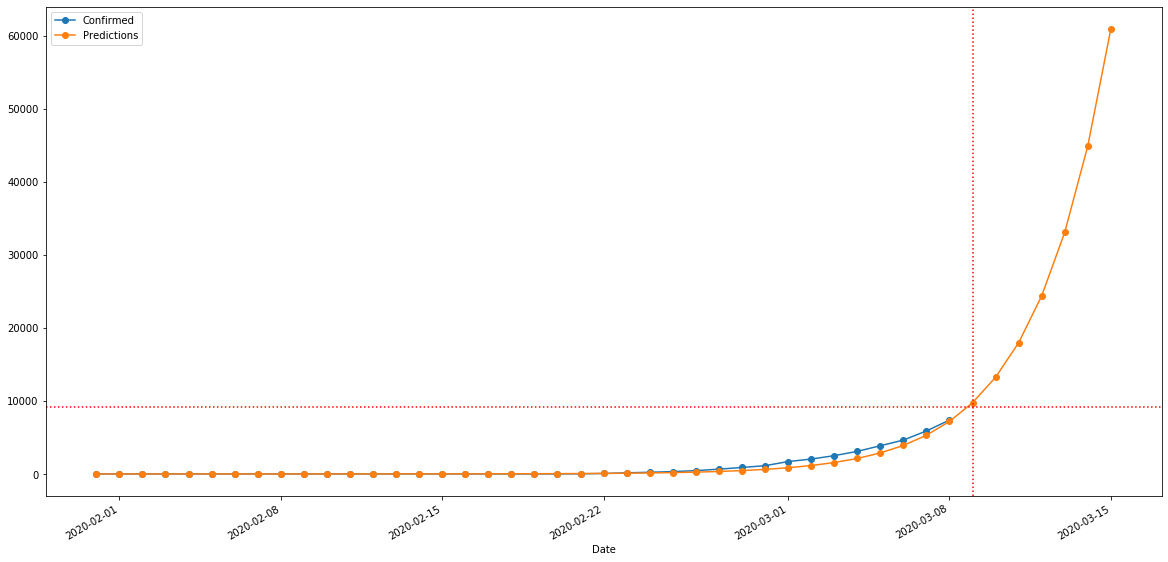

In [62]:
ax = plt.gca()

italy_df.plot(x='Date', y=["Confirmed"], figsize=(20,10), ax=ax, marker='o')
df_estimates.plot(x='Date', y=["Predictions"], figsize=(20,10), ax=ax, marker='o')
ax.axhline(9172, 0, 1, ls=':', color='red')
ax.axvline("2020-03-09", 0, 1, ls=':', color='red')

### Estimate people in IC

Assume that 10% of infected people require a bed in IC

In [59]:
italy_df['Confirmed_IC'] = italy_df['Confirmed']*0.1
df_estimates['Predictions_IC'] = df_estimates['Predictions']*0.1
df_estimates['IC caspacity (national)'] = 5000

### Plot results

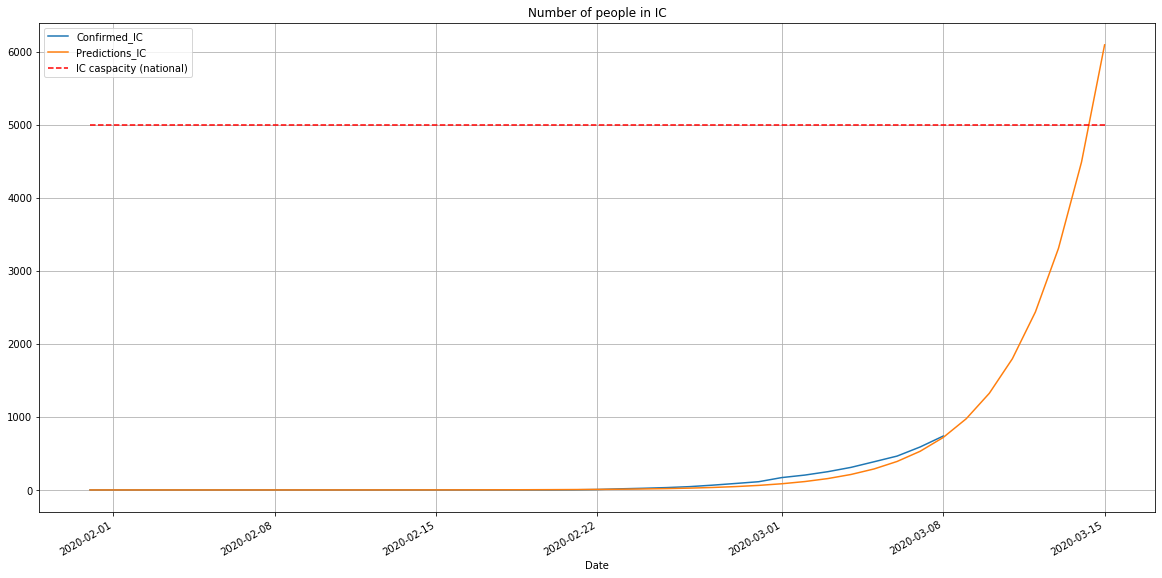

In [60]:
ax = plt.gca()

italy_df.plot(x='Date', y=["Confirmed_IC"], figsize=(20,10), ax=ax)
df_estimates.plot(x='Date', y=["Predictions_IC"], figsize=(20,10), ax=ax, grid=True)
df_estimates.plot(x='Date', y=['IC caspacity (national)'], ax=ax, grid=True, color='red', ls='--')
plt.title("Number of people in IC");

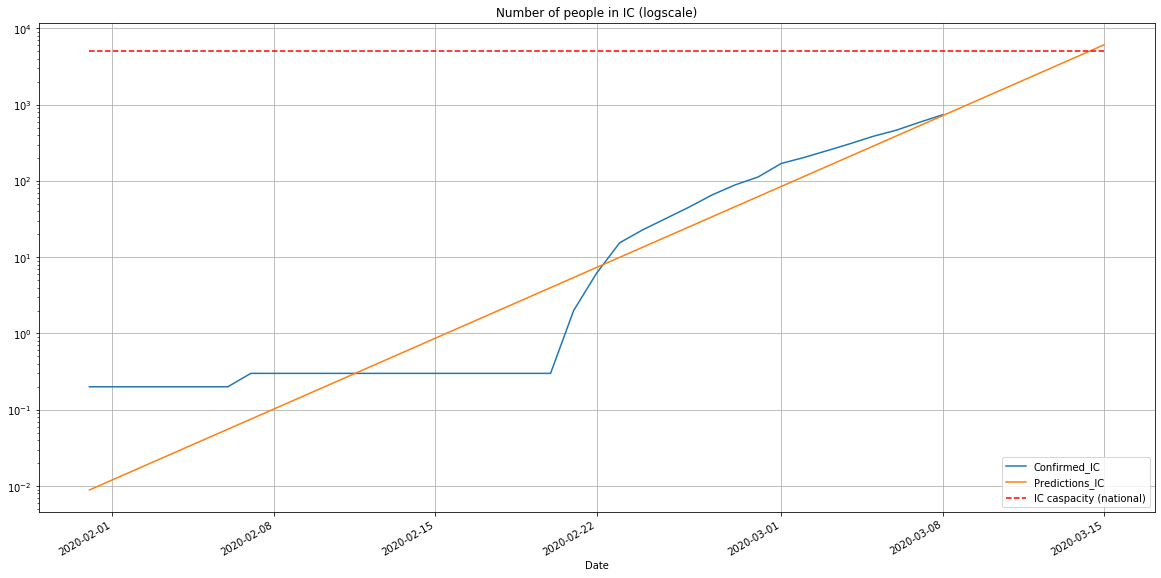

In [38]:
ax = plt.gca()

italy_df.plot(x='Date', y=["Confirmed_IC"], figsize=(20,10), ax=ax)
df_estimates.plot(x='Date', y=["Predictions_IC"], figsize=(20,10), ax=ax, grid=True)
df_estimates.plot(x='Date', y=['IC caspacity (national)'], ax=ax, grid=True, color='red', ls='--', logy=True)
plt.title("Number of people in IC (logscale)");